In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib widget

In [11]:
madden_df = pd.read_csv('data2023/actualmaddenratings.csv')

In [12]:
feature_columns = ['Position', 'Age', 'Height', 'Weight', 'Overall', 'Speed',
 'Acceleration', 'Agility', 'Change of Dir', 'Strength', 'Jumping',
 'Awareness', 'Carrying', 'Break Tackle', 'Juke Move', 'Spin Move',
 'Trucking', 'Stiff Arm', 'BC Vision', 'Catching', 'Catch In Traffic',
 'Spec Catch', 'Release', 'Short RR', 'Medium RR', 'Deep RR',
 'Throw Power', 'Throw Acc Short', 'Throw Acc Mid', 'Throw Acc Deep',
 'Throw Under Pressure', 'Throw On The Run', 'Play Action', 'Break Sack',
 'Run Block', 'Run Block Power', 'Run Block Finesse', 'Pass Block',
 'Pass Block Power', 'Pass Block Finesse', 'Impact Blocking',
 'Lead Blocking', 'Tackle', 'Hit Power', 'Pursuit', 'Man Coverage',
 'Zone Coverage', 'Press', 'Play Recognition', 'Power Moves',
 'Finesse Moves', 'Block Shedding', 'Kick Power', 'Kick Accuracy',
 'Kick Return', 'Stamina', 'Injury', 'Toughness', 'Years Pro']

feature_df = madden_df.drop(madden_df.columns.difference(feature_columns), axis='columns')

In [13]:
feature_df = feature_df[feature_df['Position'].isin(['WR', 'QB', 'TE', 'RG', 'HB', 'LT', 'LG', 'C', 'RT', 'FB'])].reset_index(drop=True)

In [14]:
feature_df['Position'].unique()

array(['WR', 'QB', 'TE', 'RG', 'HB', 'LT', 'LG', 'C', 'RT', 'FB'],
      dtype=object)

In [15]:
X = feature_df.drop('Position', axis='columns')
X.head()

,Age,Height,Weight,Overall,Speed,Acceleration,Agility,Change of Dir,Strength,Jumping,...,Power Moves,Finesse Moves,Block Shedding,Kick Power,Kick Accuracy,Kick Return,Stamina,Injury,Toughness,Years Pro
0,28,73,215,99,91,92,92,92,63,94,...,10,10,52,25,30,45,96,93,88,7
1,25,75,230,99,81,87,88,87,70,74,...,10,10,24,20,10,10,96,95,96,4
2,31,77,260,99,86,89,86,75,79,92,...,20,20,40,35,32,6,97,89,91,8
3,29,73,212,98,90,90,92,88,78,99,...,30,32,45,20,20,72,98,97,97,8
4,30,76,315,98,69,80,64,60,95,70,...,10,10,27,9,14,10,93,94,96,7


In [16]:
pca = PCA(n_components=6)
pca.fit(feature_df.drop(['Position'], axis='columns'))

PCA(n_components=6)

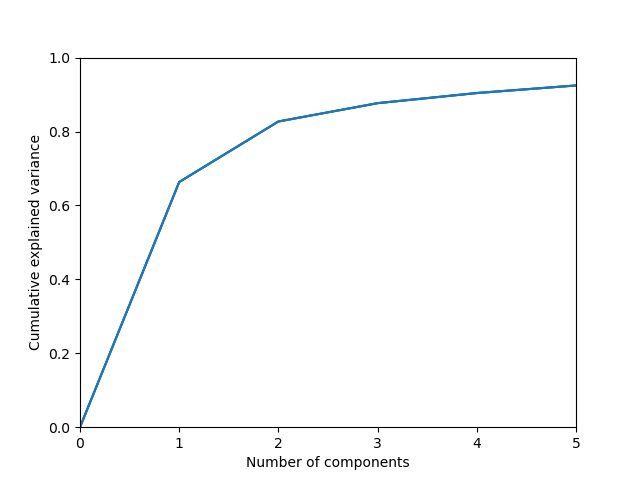

In [17]:
plt.plot(np.r_[[0],np.cumsum(pca.explained_variance_ratio_)], c='tab:blue')
plt.xlim(0, pca.n_components_ - 1)
plt.ylim(0, 1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [18]:
Y = feature_df['Position']
Y_dict = Y.map({'WR': 0, 'QB': 1, 'TE': 2, 'RG': 3, 'HB': 4, 'LT': 5, 'LG': 6, 'C': 7, 'RT': 8, 'FB': 9})
Y.head()

0    WR
1    QB
2    TE
3    WR
4    RG
Name: Position, dtype: object

In [19]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

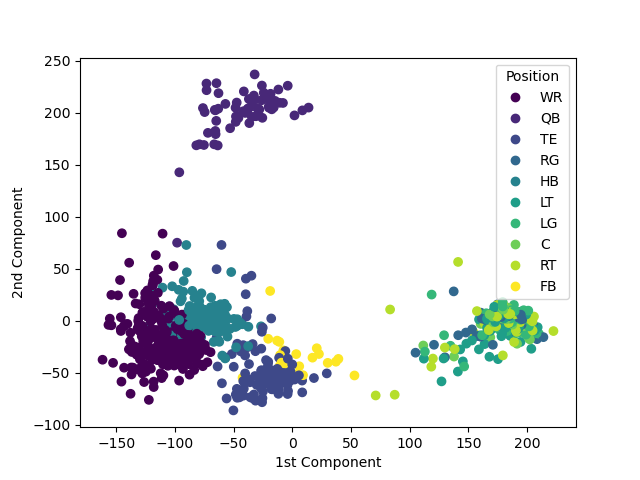

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()

X_reduced = pca.transform(X)

scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y_dict, label=Y)

handles, label = scatter.legend_elements()

ax.legend(handles, ['WR', 'QB', 'TE', 'RG', 'HB', 'LT', 'LG', 'C', 'RT', 'FB'], title='Position')

ax.set_xlabel('1st Component')
ax.set_ylabel('2nd Component')

plt.show()

In [21]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

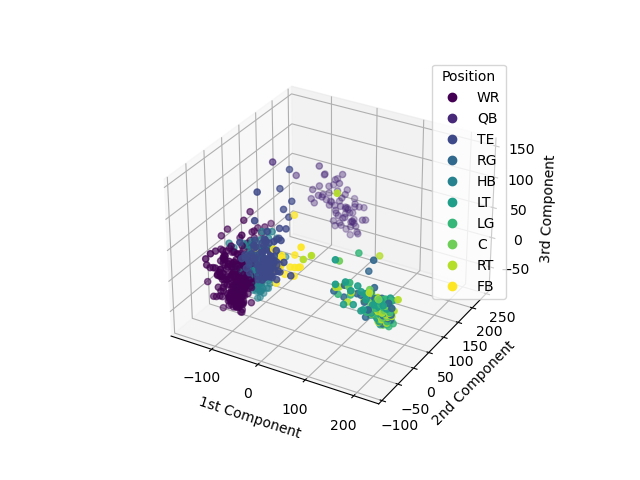

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X_reduced = pca.transform(X)

scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y_dict, label=Y)

handles, label = scatter.legend_elements()

ax.legend(handles, ['WR', 'QB', 'TE', 'RG', 'HB', 'LT', 'LG', 'C', 'RT', 'FB'], title='Position')

ax.set_xlabel('1st Component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')

plt.show()